<a href="https://colab.research.google.com/github/Dharsenipriya/Ai_based_collab_project/blob/main/k_mean_customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans
error = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  error.append(kmeans.inertia_)

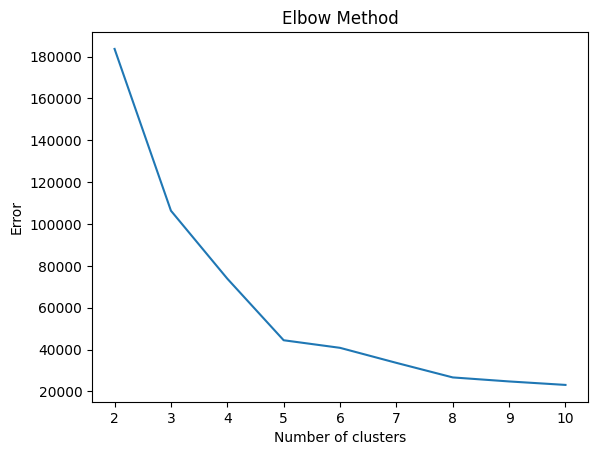

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [ ]:
df['group'] = kmeans.predict(x)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

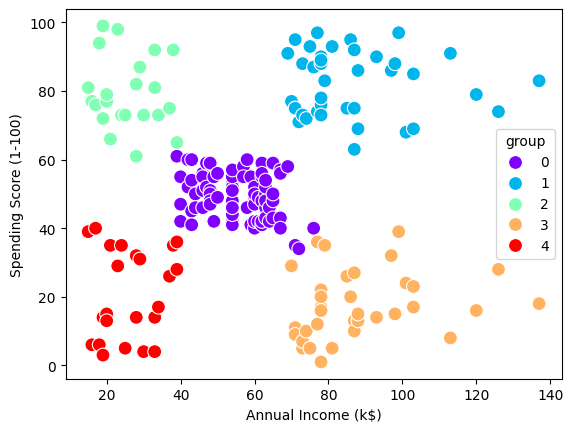

In [ ]:
import seaborn as sns
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['group'], palette ='rainbow' , s = 100)

In [ ]:
kmeans.predict([[30,15]])
kmeans

KMeans(n_clusters=5, random_state=42)

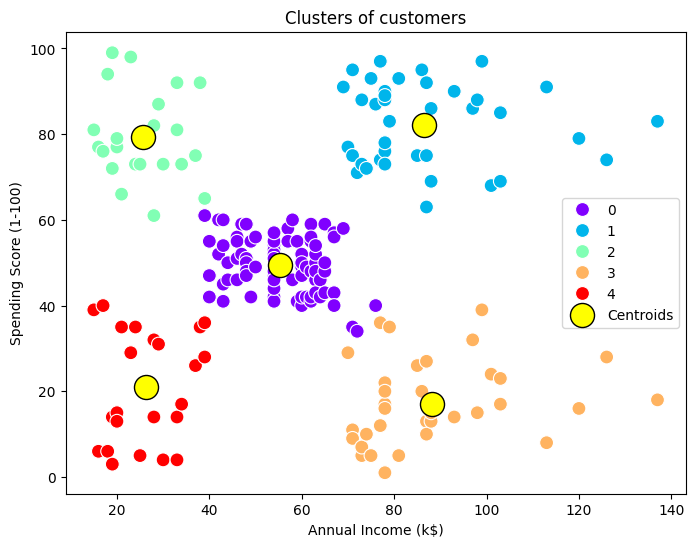

In [ ]:
# Visualize the results with cluster centers
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['group'], palette ='rainbow' , s = 100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids', edgecolors='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Display the cluster centers
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
dt = pd.read_csv('/content/sample_data/groceries.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transaction = dt.apply(lambda x : x.dropna().tolist(), axis=1).tolist()

In [ ]:
transaction[0:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

In [ ]:
from  mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_items = apriori(df, min_support = 0.03, use_colnames = True)
frequent_items.tail()

,support,itemsets
58,0.048907,"(root vegetables, whole milk)"
59,0.040061,"(whole milk, soda)"
60,0.042298,"(whole milk, tropical fruit)"
61,0.032232,"(whole milk, whipped/sour cream)"
62,0.056024,"(whole milk, yogurt)"


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 0.03)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,1.0,0.006126,1.027703,0.239450,0.103617,0.026956,0.222724
1,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,1.0,0.006126,1.080446,0.200417,0.103617,0.074456,0.222724
2,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,1.0,0.009355,1.179008,0.334375,0.099108,0.151829,0.243965
3,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,1.0,0.009355,1.041577,0.411963,0.099108,0.039917,0.243965
4,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,1.0,0.007013,1.049620,0.201713,0.127240,0.047274,0.225899
5,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,1.0,0.007013,1.046477,0.204103,0.127240,0.044413,0.225899
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,1.0,0.026291,1.179941,0.688008,0.185731,0.152500,0.339789
8,(other vegetables),(soda),0.193493,0.174377,0.032740,0.169207,0.970348,1.0,-0.001000,0.993776,-0.036507,0.097694,-0.006263,0.178481
9,(soda),(other vegetables),0.174377,0.193493,0.032740,0.187755,0.970348,1.0,-0.001000,0.992936,-0.035692,0.097694,-0.007114,0.178481


In [ ]:
prd = input('Enter product: ').lower()
prd_rulke = rules[rules['antecedents'].apply(lambda x : prd in x)]
if not prd_rulke.empty:
  print("Recommended:")
  for i in prd_rulke['consequents']:
    print(list(i)[0])
else:
  print('No recommendation found')

Enter product: soda
Recommended:
other vegetables
rolls/buns
whole milk


In [ ]:
import gradio as gr
import pandas as pd
from mlxtend.frequent_patterns import association_rules
import numpy as np

# Assume 'rules' is already defined from the previous steps and 'df' is the one-hot encoded DataFrame

# Function to get unique items from the one-hot encoded DataFrame
def get_unique_items(df):
    return df.columns.tolist()

# Get the list of unique items
try:
    # Use the one-hot encoded dataframe 'df' from previous steps
    all_items = get_unique_items(df)
except NameError:
    print("Warning: 'df' (one-hot encoded DataFrame) not found. Please run the data preprocessing steps.")
    all_items = [] # Provide an empty list if df is not available

def recommend_items_gradio(selected_items):
    """
    Recommends items based on association rules and a list of selected items.

    Args:
      selected_items: A list of items selected from the dropdown.

    Returns:
      A string containing the recommended items, or a message if no recommendations are found.
    """
    if not selected_items:
        return "Please select at least one item."

    # The recommend_items function expects a list of individual items, not a list containing a list
    # If the Gradio dropdown is configured for multiple selections, selected_items will be a list of strings.
    # If it's a single selection dropdown, selected_items will be a single string.
    # We need to ensure we pass a list of strings to the recommend_items function.
    if isinstance(selected_items, str):
        entered_items = [selected_items.lower()]
    elif isinstance(selected_items, list):
        entered_items = [item.lower() for item in selected_items]
    else:
        return "Invalid input type."


    # Assume recommend_items function is defined elsewhere and takes rules and a list of items
    # Example placeholder for recommend_items if it's not defined:
    try:
        recommend_items
    except NameError:
        def recommend_items(rules_df, basket_items):
            recommended = set()
            for _, rule in rules_df.iterrows():
                antecedent = set(rule['antecedents'])
                # Check if all items in the antecedent are in the basket
                if antecedent.issubset(set(basket_items)):
                    # Add consequents to the recommended set if not already in the basket
                    for consequent_item in rule['consequents']:
                        if consequent_item not in basket_items:
                            recommended.add(consequent_item)
            return list(recommended)


    recommended_items_list = recommend_items(rules, entered_items)

    if recommended_items_list:
        return "Recommended items:\n" + "\n".join([f"- {item}" for item in recommended_items_list])
    else:
        return "No recommendations found for the given items."

# Create the Gradio interface with a Dropdown for input
iface = gr.Interface(
    fn=recommend_items_gradio,
    inputs=gr.Dropdown(choices=all_items, label="Select items", multiselect=True), # Use Dropdown with multiselect
    outputs=gr.Textbox(label="Recommendations"),
    title="Grocery Recommendation System",
    description="Select items in your basket to get recommendations based on association rules."
)

# Launch the Gradio interface
iface.launch()

/usr/local/lib/python3.11/dist-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09
/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9c788ff5744741ca6f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%pip install gradio